<a href="https://colab.research.google.com/github/savvyguru/TensorFlow/blob/master/CIFAR(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4937 - accuracy: 0.4547 - val_loss: 1.2239 - val_accuracy: 0.5612
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1239 - accuracy: 0.6055 - val_loss: 1.0641 - val_accuracy: 0.6307
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9623 - accuracy: 0.6623 - val_loss: 0.9948 - val_accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8603 - accuracy: 0.6999 - val_loss: 0.8967 - val_accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7899 - accuracy: 0.7243 - val_loss: 0.8596 - val_accuracy: 0.7057
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7316 - accuracy: 0.7431 - val_loss: 0.8991 - val_accuracy: 0.6930
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6849 - accuracy: 0.7591 - val_loss: 0.8718 -

313/313 - 4s - loss: 0.8706 - accuracy: 0.7157


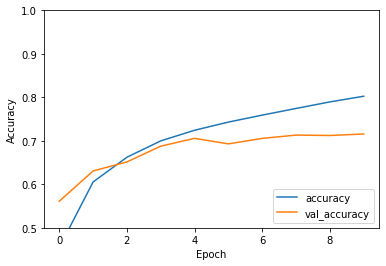

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)